##Dados

In [87]:
from os import error
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Fundamentals_Deep_Learning/NLP/Womens Clothing E-Commerce Reviews.csv')

In [88]:
len(df)

23486

##Tratando o dataset

In [89]:
df = df[df['Rating'].notna()]
df = df[df['Review Text'].notna()]
df = df[df['Rating'] != '']
df = df[df['Review Text'] != '']

In [90]:
len(df)

22641

In [8]:
def convert_rating(rating):
    if 1 <= rating <= 2:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2

df['Rating'] = df['Rating'].apply(convert_rating)

##Análise dos dados

In [33]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


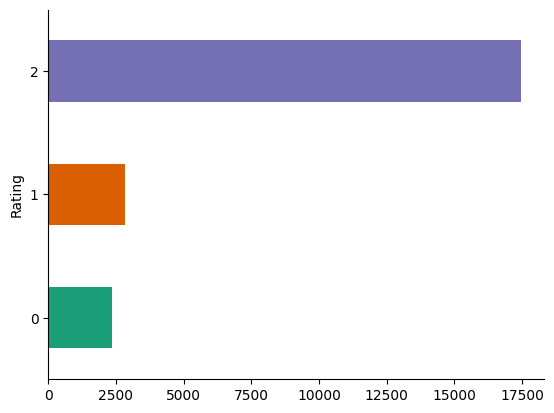

In [8]:
# @title Rating

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

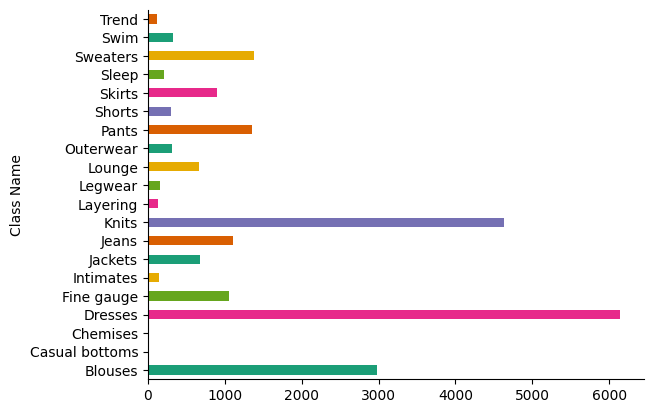

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Class Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,22641.000000,22641.000000,22641.000000,22641.000000,22641.000000,22641.000000
mean,11740.849035,919.332362,43.280376,1.665960,0.818868,2.630582
std,6781.957509,202.266874,12.326980,0.657139,0.385136,5.786164
min,0.000000,1.000000,18.000000,0.000000,0.000000,0.000000
25%,5872.000000,861.000000,34.000000,2.000000,1.000000,0.000000
50%,11733.000000,936.000000,41.000000,2.000000,1.000000,1.000000
75%,17621.000000,1078.000000,52.000000,2.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,2.000000,1.000000,122.000000


##Preparar os dados

In [91]:
#isolar uma classe de produto que possui quantidade maior de avaliação
classes_desejadas = ["Dresses"]
df_filtrado = df.loc[df['Class Name'].isin(classes_desejadas)]

In [92]:
len(df_filtrado)

6145

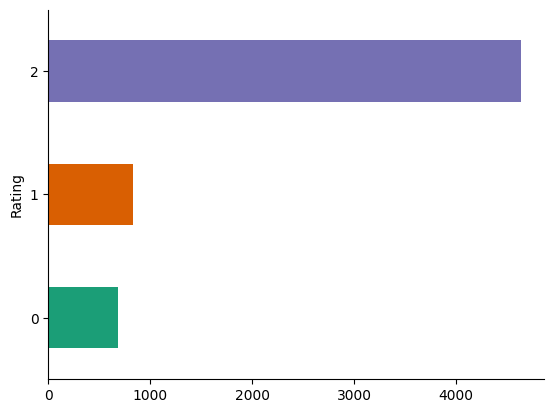

In [36]:
# @title Dresses Rating

from matplotlib import pyplot as plt
import seaborn as sns
df_filtrado.groupby('Rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
#divisão de conjunto
from sklearn.model_selection import train_test_split

def split_data(df, text_column, label_column, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        df[text_column],
        df[label_column],
        test_size=test_size,
        random_state=random_state
    )
    return X_train, X_test, y_train, y_test

In [13]:
#divisão do conjunto
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = split_data(df_filtrado, 'Review Text', 'Rating')

In [14]:
X_train.head()

,Review Text
20457,"Maeve once again created another beauty! love,..."
2046,Should've ordered a larger size. it runs a bit...
13189,"I wanted to love this dress, the open back, th..."
19198,Online this dress caught my eye but the review...
10373,The burgundy and black dress is stunning on. b...


## Método para gerar matriz de confusão

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Função para exibir a matriz de confusão
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(set(y_true)))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.show()

##Modelo SVM + Bag of Words (com separação da coluna Class)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Vetorização com BoW
vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train).toarray()
X_test_bow = vectorizer.transform(X_test).toarray()

# Treinar o SVM
svm_bow = SVC(kernel='linear', probability=True, class_weight='balanced')
svm_bow.fit(X_train_bow, y_train)

SVC(class_weight='balanced', kernel='linear', probability=True)

In [19]:
# Avaliar BoW
y_pred_bow = svm_bow.predict(X_test_bow)
print("SVM + BoW")
print(classification_report(y_test, y_pred_bow))

SVM + BoW
              precision    recall  f1-score   support

           0       0.43      0.53      0.48       142
           1       0.32      0.30      0.31       171
           2       0.88      0.85      0.87       916

    accuracy                           0.74      1229
   macro avg       0.54      0.56      0.55      1229
weighted avg       0.75      0.74      0.74      1229



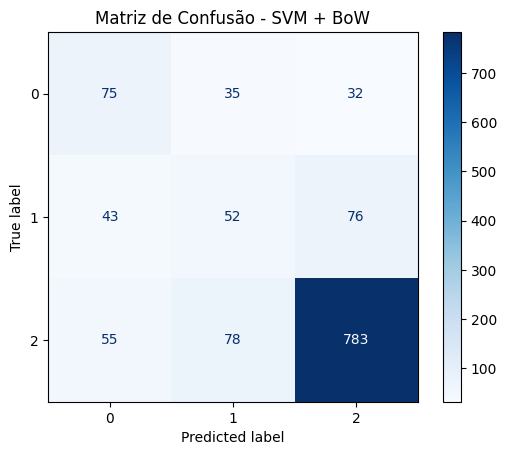

In [20]:
# Matriz de confusão
plot_confusion_matrix(y_test, y_pred_bow, model_name="SVM + BoW")

##Modelo SVM + Embeddings (com separação da coluna Class)

In [21]:
import numpy as np
import nltk

from gensim.models import Word2Vec
nltk.download('punkt_tab')

# Criando Embeddings com Word2Vec
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in X_train]
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

def get_sentence_embedding(sentence):
    tokens = nltk.word_tokenize(sentence)
    embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(100)

X_train_emb = np.array([get_sentence_embedding(sentence) for sentence in X_train])
X_test_emb = np.array([get_sentence_embedding(sentence) for sentence in X_test])

# Treinar o SVM
svm_emb = SVC(kernel='linear', probability=True, class_weight='balanced')
svm_emb.fit(X_train_emb, y_train)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


SVC(class_weight='balanced', kernel='linear', probability=True)

In [22]:
# Avaliar
y_pred_emb = svm_emb.predict(X_test_emb)
print("SVM + Word Embeddings")
print(classification_report(y_test, y_pred_emb))

SVM + Word Embeddings
              precision    recall  f1-score   support

           0       0.31      0.50      0.39       142
           1       0.24      0.50      0.32       171
           2       0.93      0.65      0.77       916

    accuracy                           0.61      1229
   macro avg       0.49      0.55      0.49      1229
weighted avg       0.76      0.61      0.66      1229



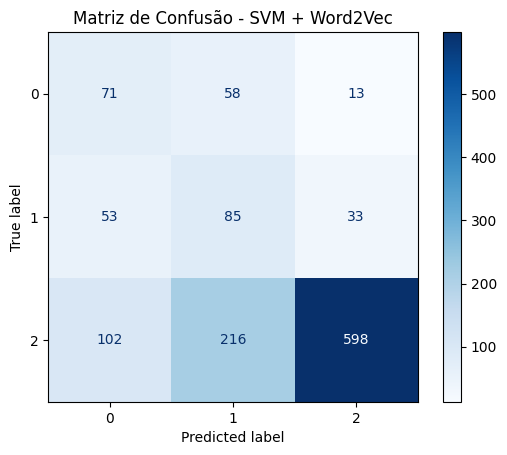

In [23]:
# Matriz de confusão
plot_confusion_matrix(y_test, y_pred_emb, model_name="SVM + Word2Vec")

##Modelo BERT (com separação da coluna Class)

In [24]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

# Dataset personalizado
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        tokens = self.tokenizer(text, padding='max_length', max_length=self.max_len, truncation=True, return_tensors="pt")
        return {'input_ids': tokens['input_ids'].squeeze(0), 'attention_mask': tokens['attention_mask'].squeeze(0), 'label': torch.tensor(label, dtype=torch.long)}

# Tokenizer e dataset
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_dataset = SentimentDataset(X_train, y_train, tokenizer)
test_dataset = SentimentDataset(X_test, y_test, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Modelo
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# Treinamento
model.train()
for epoch in range(3):  # 3 épocas
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch['input_ids'], batch['attention_mask'], batch['label']
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
# Avaliação
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch['input_ids'], batch['attention_mask'], batch['label']
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(F.softmax(outputs.logits, dim=1), dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("BERT")
print(classification_report(all_labels, all_preds))

BERT
              precision    recall  f1-score   support

           0       0.60      0.61      0.60       142
           1       0.33      0.59      0.42       171
           2       0.96      0.82      0.88       916

    accuracy                           0.76      1229
   macro avg       0.63      0.67      0.64      1229
weighted avg       0.83      0.76      0.79      1229



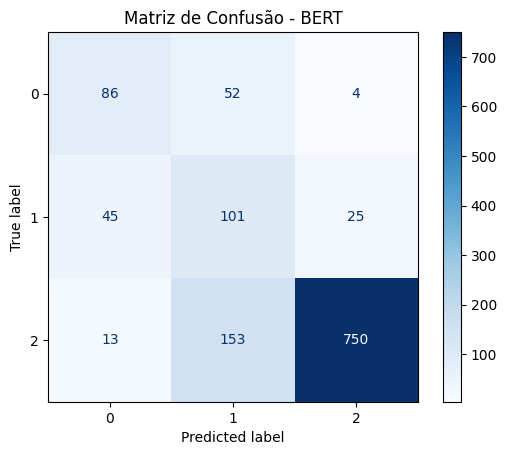

In [26]:
# Matriz de confusão
plot_confusion_matrix(all_labels, all_preds, model_name="BERT")

## Balanceando as classes

In [16]:
print("Distribuição original:")
print(df_filtrado['Rating'].value_counts())

df_class_0 = df_filtrado[df_filtrado['Rating'] == 0]
df_class_1 = df_filtrado[df_filtrado['Rating'] == 1]
df_class_2 = df_filtrado[df_filtrado['Rating'] == 2]

mean_minority_size = (len(df_class_0) + len(df_class_1)) // 2
target_size_class_2 = int(mean_minority_size * 1.2)

df_class_2_sampled = df_class_2.sample(n=target_size_class_2, random_state=42)

# Reunir todas as classes
df_balanced = pd.concat([df_class_0, df_class_1, df_class_2_sampled], axis=0)

# Verificar nova distribuição
print("\nDistribuição após ajuste:")
print(df_balanced['Rating'].value_counts())

Distribuição original:
Rating
2    4634
1     830
0     681
Name: count, dtype: int64

Distribuição após ajuste:
Rating
2    906
1    830
0    681
Name: count, dtype: int64


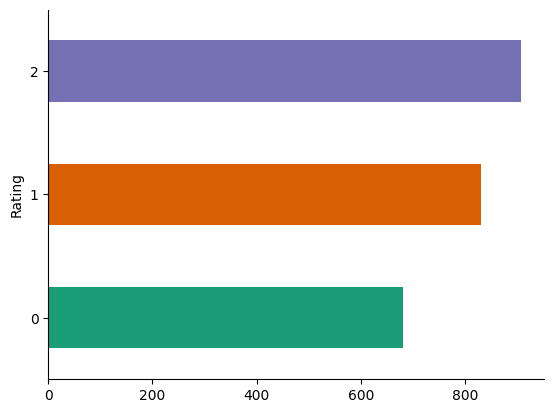

In [17]:
# @title Balanced Dresses Rating

from matplotlib import pyplot as plt
import seaborn as sns
df_balanced.groupby('Rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Rodando os modelos balanceados

In [18]:
#dividir o conjunto balanceado
X_train, X_test, y_train, y_test = split_data(df_balanced, 'Review Text', 'Rating')

SVM + BoW

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Vetorização com BoW
vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train).toarray()
X_test_bow = vectorizer.transform(X_test).toarray()

# Treinar o SVM
svm_bow = SVC(kernel='linear', probability=True)
svm_bow.fit(X_train_bow, y_train)

SVC(probability=True)

In [20]:
# Avaliar BoW
y_pred_bow = svm_bow.predict(X_test_bow)
print("SVM + BoW")
print(classification_report(y_test, y_pred_bow))

SVM + BoW
              precision    recall  f1-score   support

           0       0.62      0.32      0.42       151
           1       0.45      0.62      0.52       149
           2       0.71      0.78      0.74       184

    accuracy                           0.59       484
   macro avg       0.59      0.57      0.56       484
weighted avg       0.60      0.59      0.58       484



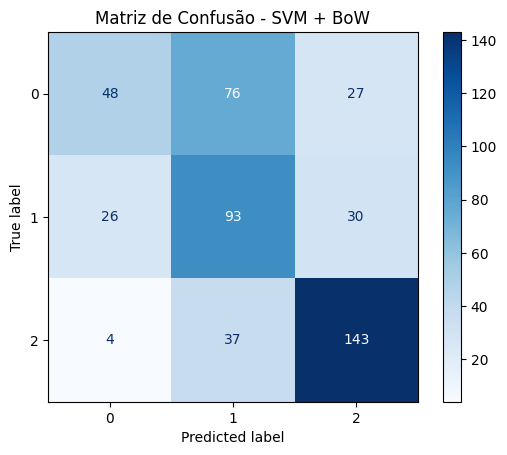

In [21]:
# Matriz de confusão
plot_confusion_matrix(y_test, y_pred_bow, model_name="SVM + BoW")

SVM + Word2Vector

In [22]:
import numpy as np
import nltk

from gensim.models import Word2Vec
nltk.download('punkt_tab')

# Criando Embeddings com Word2Vec
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in X_train]
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

def get_sentence_embedding(sentence):
    tokens = nltk.word_tokenize(sentence)
    embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(100)

X_train_emb = np.array([get_sentence_embedding(sentence) for sentence in X_train])
X_test_emb = np.array([get_sentence_embedding(sentence) for sentence in X_test])

# Treinar o SVM
svm_emb = SVC(kernel='linear', probability=True)
svm_emb.fit(X_train_emb, y_train)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


SVC(probability=True)

In [23]:
# Avaliar
y_pred_emb = svm_emb.predict(X_test_emb)
print("SVM + Word Embeddings")
print(classification_report(y_test, y_pred_emb))

SVM + Word Embeddings
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       151
           1       0.37      0.68      0.48       149
           2       0.54      0.61      0.57       184

    accuracy                           0.44       484
   macro avg       0.30      0.43      0.35       484
weighted avg       0.32      0.44      0.37       484



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


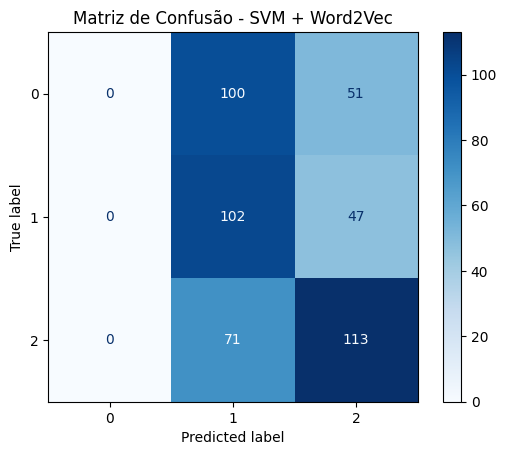

In [24]:
# Matriz de confusão
plot_confusion_matrix(y_test, y_pred_emb, model_name="SVM + Word2Vec")

BERT

In [72]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

# Dataset personalizado
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        tokens = self.tokenizer(text, padding='max_length', max_length=self.max_len, truncation=True, return_tensors="pt")
        return {'input_ids': tokens['input_ids'].squeeze(0), 'attention_mask': tokens['attention_mask'].squeeze(0), 'label': torch.tensor(label, dtype=torch.long)}

# Tokenizer e dataset
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_dataset = SentimentDataset(X_train, y_train, tokenizer)
test_dataset = SentimentDataset(X_test, y_test, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Modelo
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# Treinamento
model.train()
for epoch in range(3):  # 3 épocas
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch['input_ids'], batch['attention_mask'], batch['label']
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [73]:
# Avaliação
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch['input_ids'], batch['attention_mask'], batch['label']
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(F.softmax(outputs.logits, dim=1), dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("BERT")
print(classification_report(all_labels, all_preds))

BERT
              precision    recall  f1-score   support

           0       0.72      0.52      0.61       151
           1       0.52      0.75      0.62       149
           2       0.91      0.79      0.85       184

    accuracy                           0.70       484
   macro avg       0.72      0.69      0.69       484
weighted avg       0.73      0.70      0.70       484



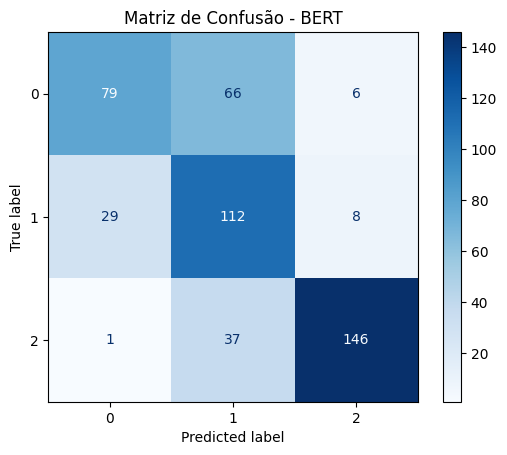

In [74]:
# Matriz de confusão
plot_confusion_matrix(all_labels, all_preds, model_name="BERT")

##Avaliando a utilização do KMeans para descobrir as Classes de Ratings

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convertendo o texto em uma representação numérica com TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_text = vectorizer.fit_transform(df_filtrado['Review Text'])

In [69]:
from sklearn.cluster import KMeans

# Aplicando o K-means
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajuste o número de clusters conforme necessário
kmeans.fit(X_text)

# Labels dos clusters atribuídos aos pontos
labels = kmeans.labels_

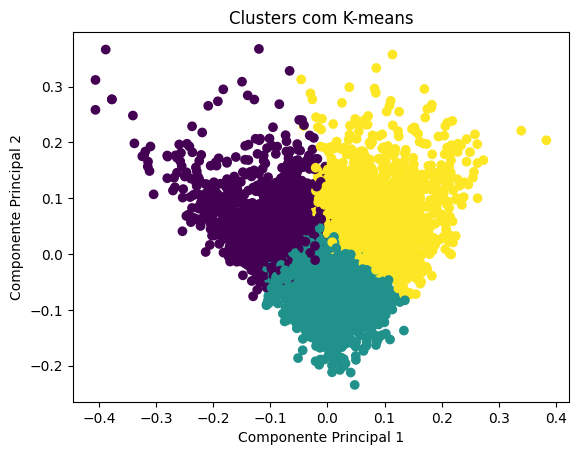

In [70]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduzindo a dimensionalidade para 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_text)

# Visualizando os clusters
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
plt.title('Clusters com K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [71]:
# Para ver as palavras mais frequentes em cada cluster, podemos pegar os centros dos clusters
terms = vectorizer.get_feature_names_out()

for i, cluster_center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}:")
    sorted_terms = cluster_center.argsort()[::-1]
    for idx in sorted_terms[:10]:  # Pegando as 10 palavras mais importantes
        print(f"\t{terms[idx]}")

Cluster 0:
	dress
	love
	great
	comfortable
	wear
	perfect
	flattering
	fits
	summer
	compliments
Cluster 1:
	dress
	like
	fabric
	just
	look
	really
	fit
	beautiful
	love
	material
Cluster 2:
	size
	dress
	small
	fit
	petite
	ordered
	large
	wear
	runs
	usually


##Testando o uso do Tfidf como entrada para o KMeans e posteriormente SVM

In [79]:
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Passo 1: Vetorização do texto (Tfidf)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df_filtrado['Review Text'])

# Passo 2: Aplicar o K-means para gerar os clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Passo 3: Usar as labels de K-means como rótulos para o modelo SVM
y = kmeans.labels_

# Passo 4: Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 5: Treinar o modelo SVM
svm = SVC(kernel='linear', probability=True)  # SVM com kernel linear
svm.fit(X_train, y_train)

# Passo 6: Avaliar o modelo SVM
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       278
           1       0.94      0.96      0.95       598
           2       0.95      0.94      0.95       353

    accuracy                           0.94      1229
   macro avg       0.95      0.94      0.94      1229
weighted avg       0.94      0.94      0.94      1229



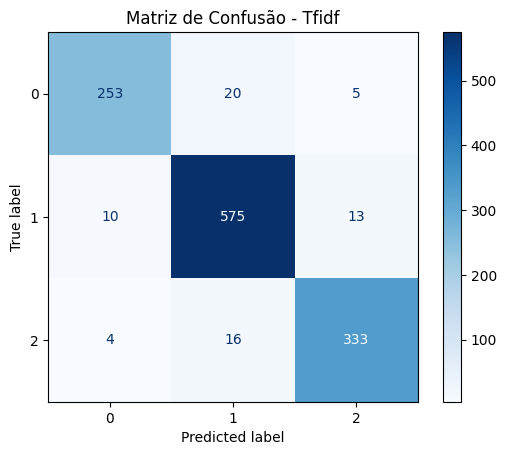

In [81]:
# Matriz de confusão
plot_confusion_matrix(y_test, y_pred, model_name="Tfidf")

##BoW + K-means + SVM

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Vetorização com BoW
vectorizer = CountVectorizer(max_features=5000)

X = vectorizer.fit_transform(df_filtrado['Review Text'])

In [94]:
# K-means para criar clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Usar as labels geradas pelo K-means como rótulos
y = kmeans.labels_

In [96]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# Treinar o modelo SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [98]:
# Avaliar o modelo
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       383
           1       0.97      0.95      0.96       305
           2       0.99      0.98      0.98       541

    accuracy                           0.97      1229
   macro avg       0.96      0.96      0.96      1229
weighted avg       0.97      0.97      0.97      1229



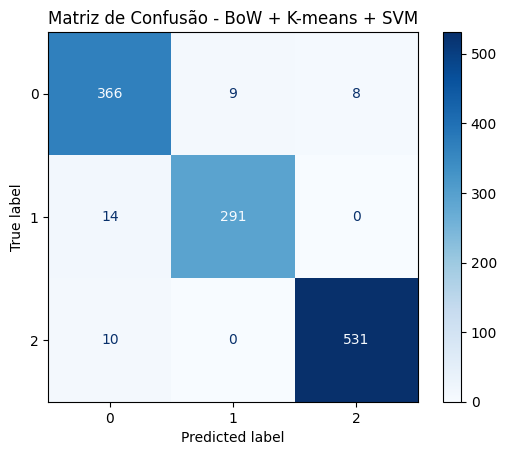

In [99]:
# Matriz de confusão
plot_confusion_matrix(y_test, y_pred, model_name="BoW + K-means + SVM")

##Word2Vec + K-means + SVM

In [117]:
import numpy as np
import nltk
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

nltk.download('punkt_tab')

# Passo 2: Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    df_filtrado['Review Text'],
    df_filtrado['Rating'],
    test_size=0.2,
    random_state=42
)

# Passo 3: Criar embeddings com Word2Vec
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in X_train]
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

def get_sentence_embedding(sentence):
    tokens = nltk.word_tokenize(sentence)
    embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(100)

# Gerar embeddings para o conjunto de treino e teste
X_train_embeddings = np.array([get_sentence_embedding(sentence) for sentence in X_train])
X_test_embeddings = np.array([get_sentence_embedding(sentence) for sentence in X_test])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [118]:
# Passo 4: Aplicar K-Means para agrupar os embeddings
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_train_clusters = kmeans.fit_predict(X_train_embeddings)

# Passo 5: Usar os clusters como rótulos para treinar um SVM
# Codificar os clusters e as classes reais
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_clusters)

In [119]:
# Treinar o SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_embeddings, y_train_encoded)

# Passo 6: Fazer predições e avaliar o modelo
y_test_clusters = kmeans.predict(X_test_embeddings)  # Obter os clusters para o teste
y_pred_emb = svm_model.predict(X_test_embeddings)

In [122]:
# Avaliar o modelo usando métricas
print("Relatório de classificação Word2Vector + K-means + SVM:")
print(classification_report(le.inverse_transform(y_pred_emb), y_test_clusters))

Relatório de classificação Word2Vector + K-means + SVM:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       603
           1       0.95      1.00      0.97       211
           2       0.99      0.98      0.99       415

    accuracy                           0.98      1229
   macro avg       0.98      0.99      0.98      1229
weighted avg       0.98      0.98      0.98      1229



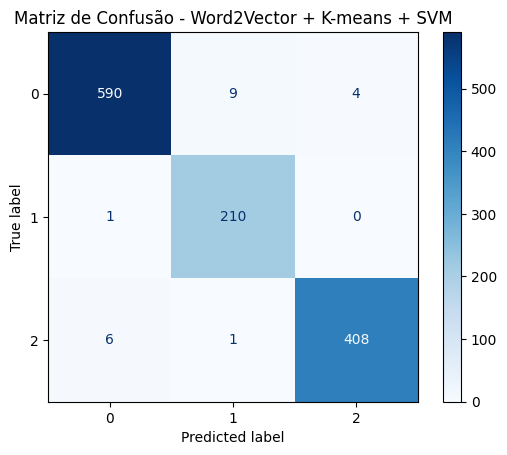

In [121]:
# Matriz de confusão
plot_confusion_matrix(y_pred_emb, y_test_clusters, model_name="Word2Vector + K-means + SVM")

##K-means + Bert

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import Dataset, DataLoader
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # Ajuste o número de classes

def get_bert_sentence_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = bert_model.bert(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

In [ ]:
X_train, X_test = train_test_split(df_filtrado['Review Text'], test_size=0.2, random_state=42)

In [ ]:
X_train_embeddings = np.array([get_bert_sentence_embedding(sentence) for sentence in X_train])

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_train_clusters = kmeans.fit_predict(X_train_embeddings)

class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels[idx]
        tokens = self.tokenizer(text, padding='max_length', max_length=self.max_len, truncation=True, return_tensors="pt")
        return {'input_ids': tokens['input_ids'].squeeze(0), 'attention_mask': tokens['attention_mask'].squeeze(0), 'label': torch.tensor(label, dtype=torch.long)}

train_dataset = SentimentDataset(X_train, y_train_clusters, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Passo 7: Treinar o BERT
optimizer = AdamW(bert_model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

bert_model.train()
for epoch in range(3):
    for batch in train_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['label']

        outputs = bert_model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1} completed. Loss: {loss.item()}")

In [ ]:
bert_model.eval()

In [132]:
# Gerar embeddings e rótulos para o conjunto de teste
X_test_embeddings = np.array([get_bert_sentence_embedding(sentence) for sentence in X_test])
y_test_clusters = kmeans.predict(X_test_embeddings)  # Clusters gerados pelo K-Means

# Preparar dataset de teste para o BERT
test_dataset = SentimentDataset(X_test, y_test_clusters, tokenizer)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [133]:
# Avaliar o desempenho
all_preds = []
all_labels = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['label']

        outputs = bert_model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

In [134]:
# Relatório de classificação
print("Relatório de classificação (K-Means + BERT):")
print(classification_report(all_labels, all_preds))

Relatório de classificação (K-Means + BERT):
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       427
           1       0.96      0.97      0.96       147
           2       0.86      1.00      0.92       655

    accuracy                           0.91      1229
   macro avg       0.94      0.91      0.92      1229
weighted avg       0.92      0.91      0.91      1229



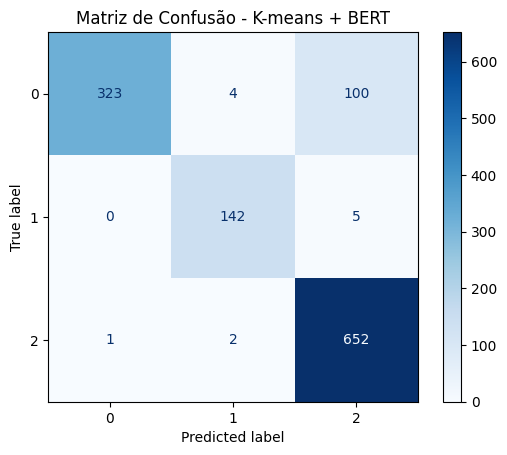

In [135]:
# Matriz de confusão
plot_confusion_matrix(all_labels, all_preds, model_name="K-means + BERT")